Date 2018/11/27
How do you work through a predictive modeling machine learning problem end-to-end?

### 21.1 Problem Definition
The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder).

### 21.2 Load the Dataset

In [2]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
dataset = pandas.read_csv(url, header=None)

### 21.3 Analyze Data
21.3.1 Descriptive Statistics

We will start off by confirming the dimensions of the dataset, e.g. the number of rows and columns.

In [4]:
# shape
print(dataset.shape)

(208, 61)


In [5]:
# types
pandas.set_option('display.max_rows' , 500)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [6]:
# head
pandas.set_option( 'display.width' , 100)
print(dataset.head(20))

        0       1       2       3       4       5       6       7       8       9  ...      51  \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111 ...  0.0027   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337  0.2872 ...  0.0084   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598  0.6194 ...  0.0232   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264 ...  0.0121   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459 ...  0.0031   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105  0.3039 ...  0.0045   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083  0.3513 ...  0.0201   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465  0.2838 ...  0.0081   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684  0.1487 ...  0.0145   
9   0.0164  0.0173  

we can see all of the data has the same scale. We can also see that the class attribute (60) has string values.

In [7]:
# descriptions, change precision to 3 places
pandas.set_option( 'precision' , 3)
print(dataset.describe())

            0          1        2        3        4        5        6        7        8        9   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122    0.135    0.178    0.208   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062    0.085    0.118    0.134   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003    0.005    0.007    0.011   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081    0.080    0.097    0.111   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107    0.112    0.152    0.182   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154    0.170    0.233    0.269   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373    0.459    0.683    0.711   

         ...           50         51         52       53         54         55         56 

the data has the same range, but interestingly di↵ering mean values. There may be some benefit from standardizing the data.

In [8]:
# class distribution
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


### 21.3.2 Unimodal Data Visualizations
It is often useful to look at your data using multiple di↵erent visualizations in order to spark ideas. 

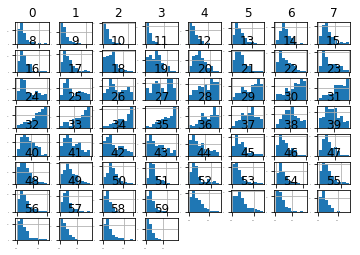

In [9]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponential- like distributions for other attributes.

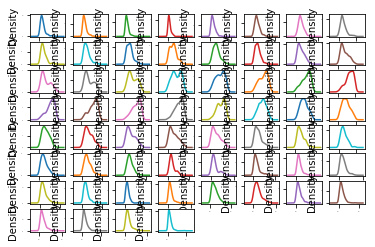

In [15]:
# density
dataset.plot(kind= 'density' , subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
plt.show()

Visualize the dataset with Box and Whisker Plots.
We can see that attributes do have quite different spreads. Given the scales are the same, it may suggest some benefit in standardizing the data for modeling to get all of the means lined up.

In [14]:
# box and whisker plots
#dataset.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False)
#plt.show()

### 21.3.3 Multimodal Data Visualizations
Let’s visualize the correlations between the attributes.

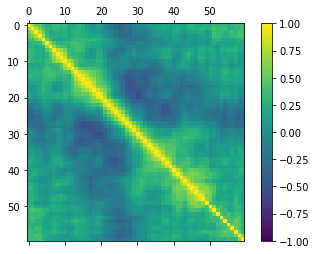

In [18]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

### 21.4 Validation Dataset


In [21]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### 21.5 Evaluate Algorithms: Baseline
We will use 10-fold cross validation. We will evaluate algorithms using the accuracy metric.

In [22]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

Let’s create a baseline of performance on this problem and spot-check a number of di↵erent algorithms. 

In [23]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB())) #Gaussian Naive Bayes
models.append(('SVM', SVC()))

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will display the mean and standard deviation of accuracy for each algorithm as we calculate it and collect the results for use later.

In [28]:
from sklearn import model_selection

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.705147 (0.105852)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


The results suggest That both Logistic
Regression and K-Nearest Neighbors may be worth further study. It is always wise to look at the distribution of accuracy values calculated across cross validation folds.

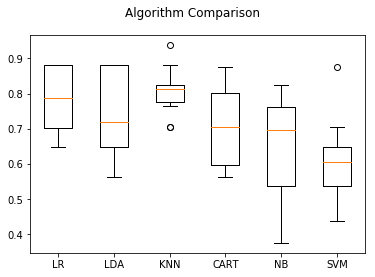

In [30]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results show a tight distribution for KNN which is encouraging, suggesting low variance. The poor results for SVM are surprising.

### 21.6 Evaluate Algorithms: Standardize Data

We suspect that the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness.

In [31]:
# Standardize the dataset
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [33]:
results = []
names = []
for name, model in pipelines:
  kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.693382 (0.096939)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


We can see that KNN is still doing well, even better than before. We can also see that the standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.

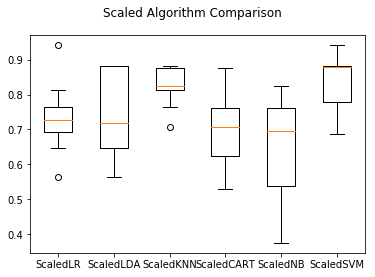

In [34]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest digging deeper into the SVM and KNN algorithms.

### 21.7 Algorithm Tuning
#### 21.7.1 Tuning KNN
The default number of neighbors is 7. Below we try all odd values of K from 1 to 21, covering the default value of 7. Each K value is evaluated using 10-fold cross validation on the training standardized dataset.

In [37]:
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.849398 using {'n_neighbors': 1}
0.850000 (0.059686) with: {'n_neighbors': 1}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.710294 (0.109505) with: {'n_neighbors': 21}


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


We can see that the optimal configuration is K=1. This is interesting as the algorithm will make predictions using the most similar instance in the training dataset alone.

### 21.7.2 Tuning SVM
We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel. 

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

In [40]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
0.529412 (0.118825) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
0.680147 (0.098595) with: {'C': 0.5, 'kernel': 'poly'}
0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
0.740074 (0.127908) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
0.752574 (0.058825) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.758824 (0.096520) with: {'C': 0.9, 'kernel': 'linear'

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


We can see the most accurate configuration was SVM with an RBF kernel and a C value of 1.5. The accuracy 86.7470% is seemingly better than what KNN could achieve.

### 21.8 Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. 
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.

In [42]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.819853 (0.058293)
GBM: 0.841912 (0.113531)
RF: 0.788235 (0.091929)
ET: 0.793382 (0.098825)


We can see that both boosting techniques provide strong accuracy scores in the low 80s (%) with default configurations. We can plot the distribution of accuracy scores across the cross validation folds.

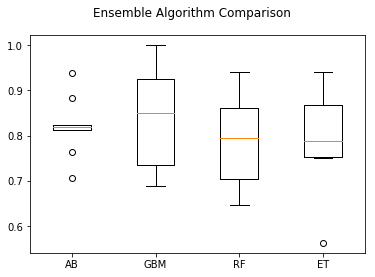

In [43]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The results suggest GBM may be worthy of further study, with a strong mean and a spread that skews up towards high 90s (%) in accuracy.

### 21.9 Finalize Model
The SVM showed the most promise as a low complexity and stable model for this problem. A part of the findings was that SVM performs better when the dataset is standardized so that all attributes have a mean value of zero and a standard deviation of one. 

In [44]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
             precision    recall  f1-score   support

          M       0.92      0.85      0.88        27
          R       0.76      0.87      0.81        15

avg / total       0.86      0.86      0.86        42



We can see that we achieve an accuracy of nearly 86% on the held-out validation dataset. A
score that matches closely to our expectations estimated above during the tuning of SVM.

### 21.10 Summary
- Problem Definition (Sonar return data).
- Loading the Dataset.
- Analyze Data (same scale but different distributions of data).
- Evaluate Algorithms (KNN looked good).
- Evaluate Algorithms with Standardization (KNN and SVM looked good).
- Algorithm Tuning (K=1 for KNN was good, SVM with an RBF kernel and C=1.5 was best).
- Ensemble Methods (Bagging and Boosting, not quite as good as SVM).
- Finalize Model (use all training data and confirm using validation dataset).
